# Ejercicio

## ¿Comprar o alquilar casa? ¿Qué me conviene?

Trataremos de decidir si nos conviene Alguilar o Comprar una casa 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Importemos Datos de entrada

In [48]:
df_data = pd.read_csv("data/comprar_alquilar.csv")
df_data.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


#### REFERENCIAS:
- ingresos y gastos son mensuales de 1 personas o 2 si están casados.
- trabajo:  
    - 0-sin trabajo 
    - 1-autonomo 
    - 2-asalariado 
    - 3-empresario 
    - 4-Autonomos 
    - 5-Asalariados 
    - 6-Autonomo y Asalariado 
    - 7-Empresario y Autonomo 
    - 8 Empresarios o empresario y autónomo
-  estado_civil: 
    - 0-soltero 
    - 1-casado 
    - 2-divorciado
- hijos: Cantidad de hijos menores (no trabajan)
- comprar: 
    - 0-mejor alquilar
    - 1-Comprar casa
- hipoteca fija a 30 años con interes

In [3]:
print(df_data.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


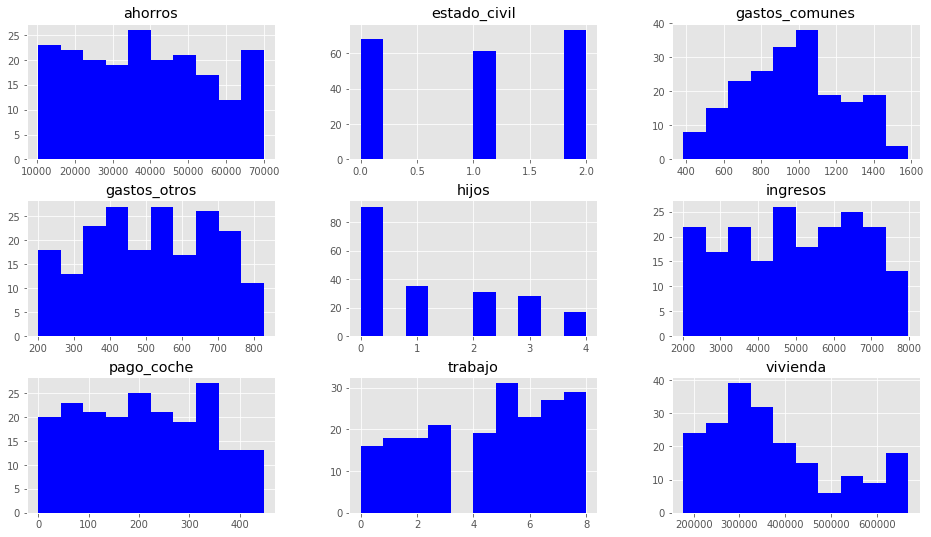

In [8]:
df_data.drop(['comprar'], axis=1).hist(color="blue")
plt.show()

# Preprocesamos los datos

Creamos 2 columnas nuevas.  
En una agrupamos los gastos mensuales y en la otra el monto a financiar para comprar la casa

In [49]:
df_data['gastos'] = (df_data['gastos_comunes']+
                     df_data['gastos_otros']+
                     df_data['pago_coche'])

df_data['financiar'] = df_data['vivienda'] - df_data['ahorros']

df_data.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


### Información estadística de los datos

In [15]:
df_reduced = df_data.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)
df_reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


### Veamos la correlación entre columnas

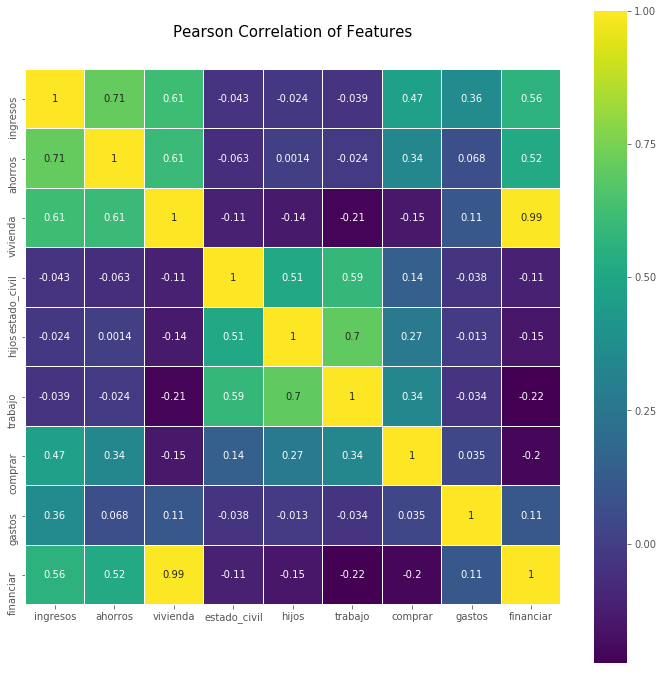

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sb.heatmap(df_reduced.astype(float).corr(),
           linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

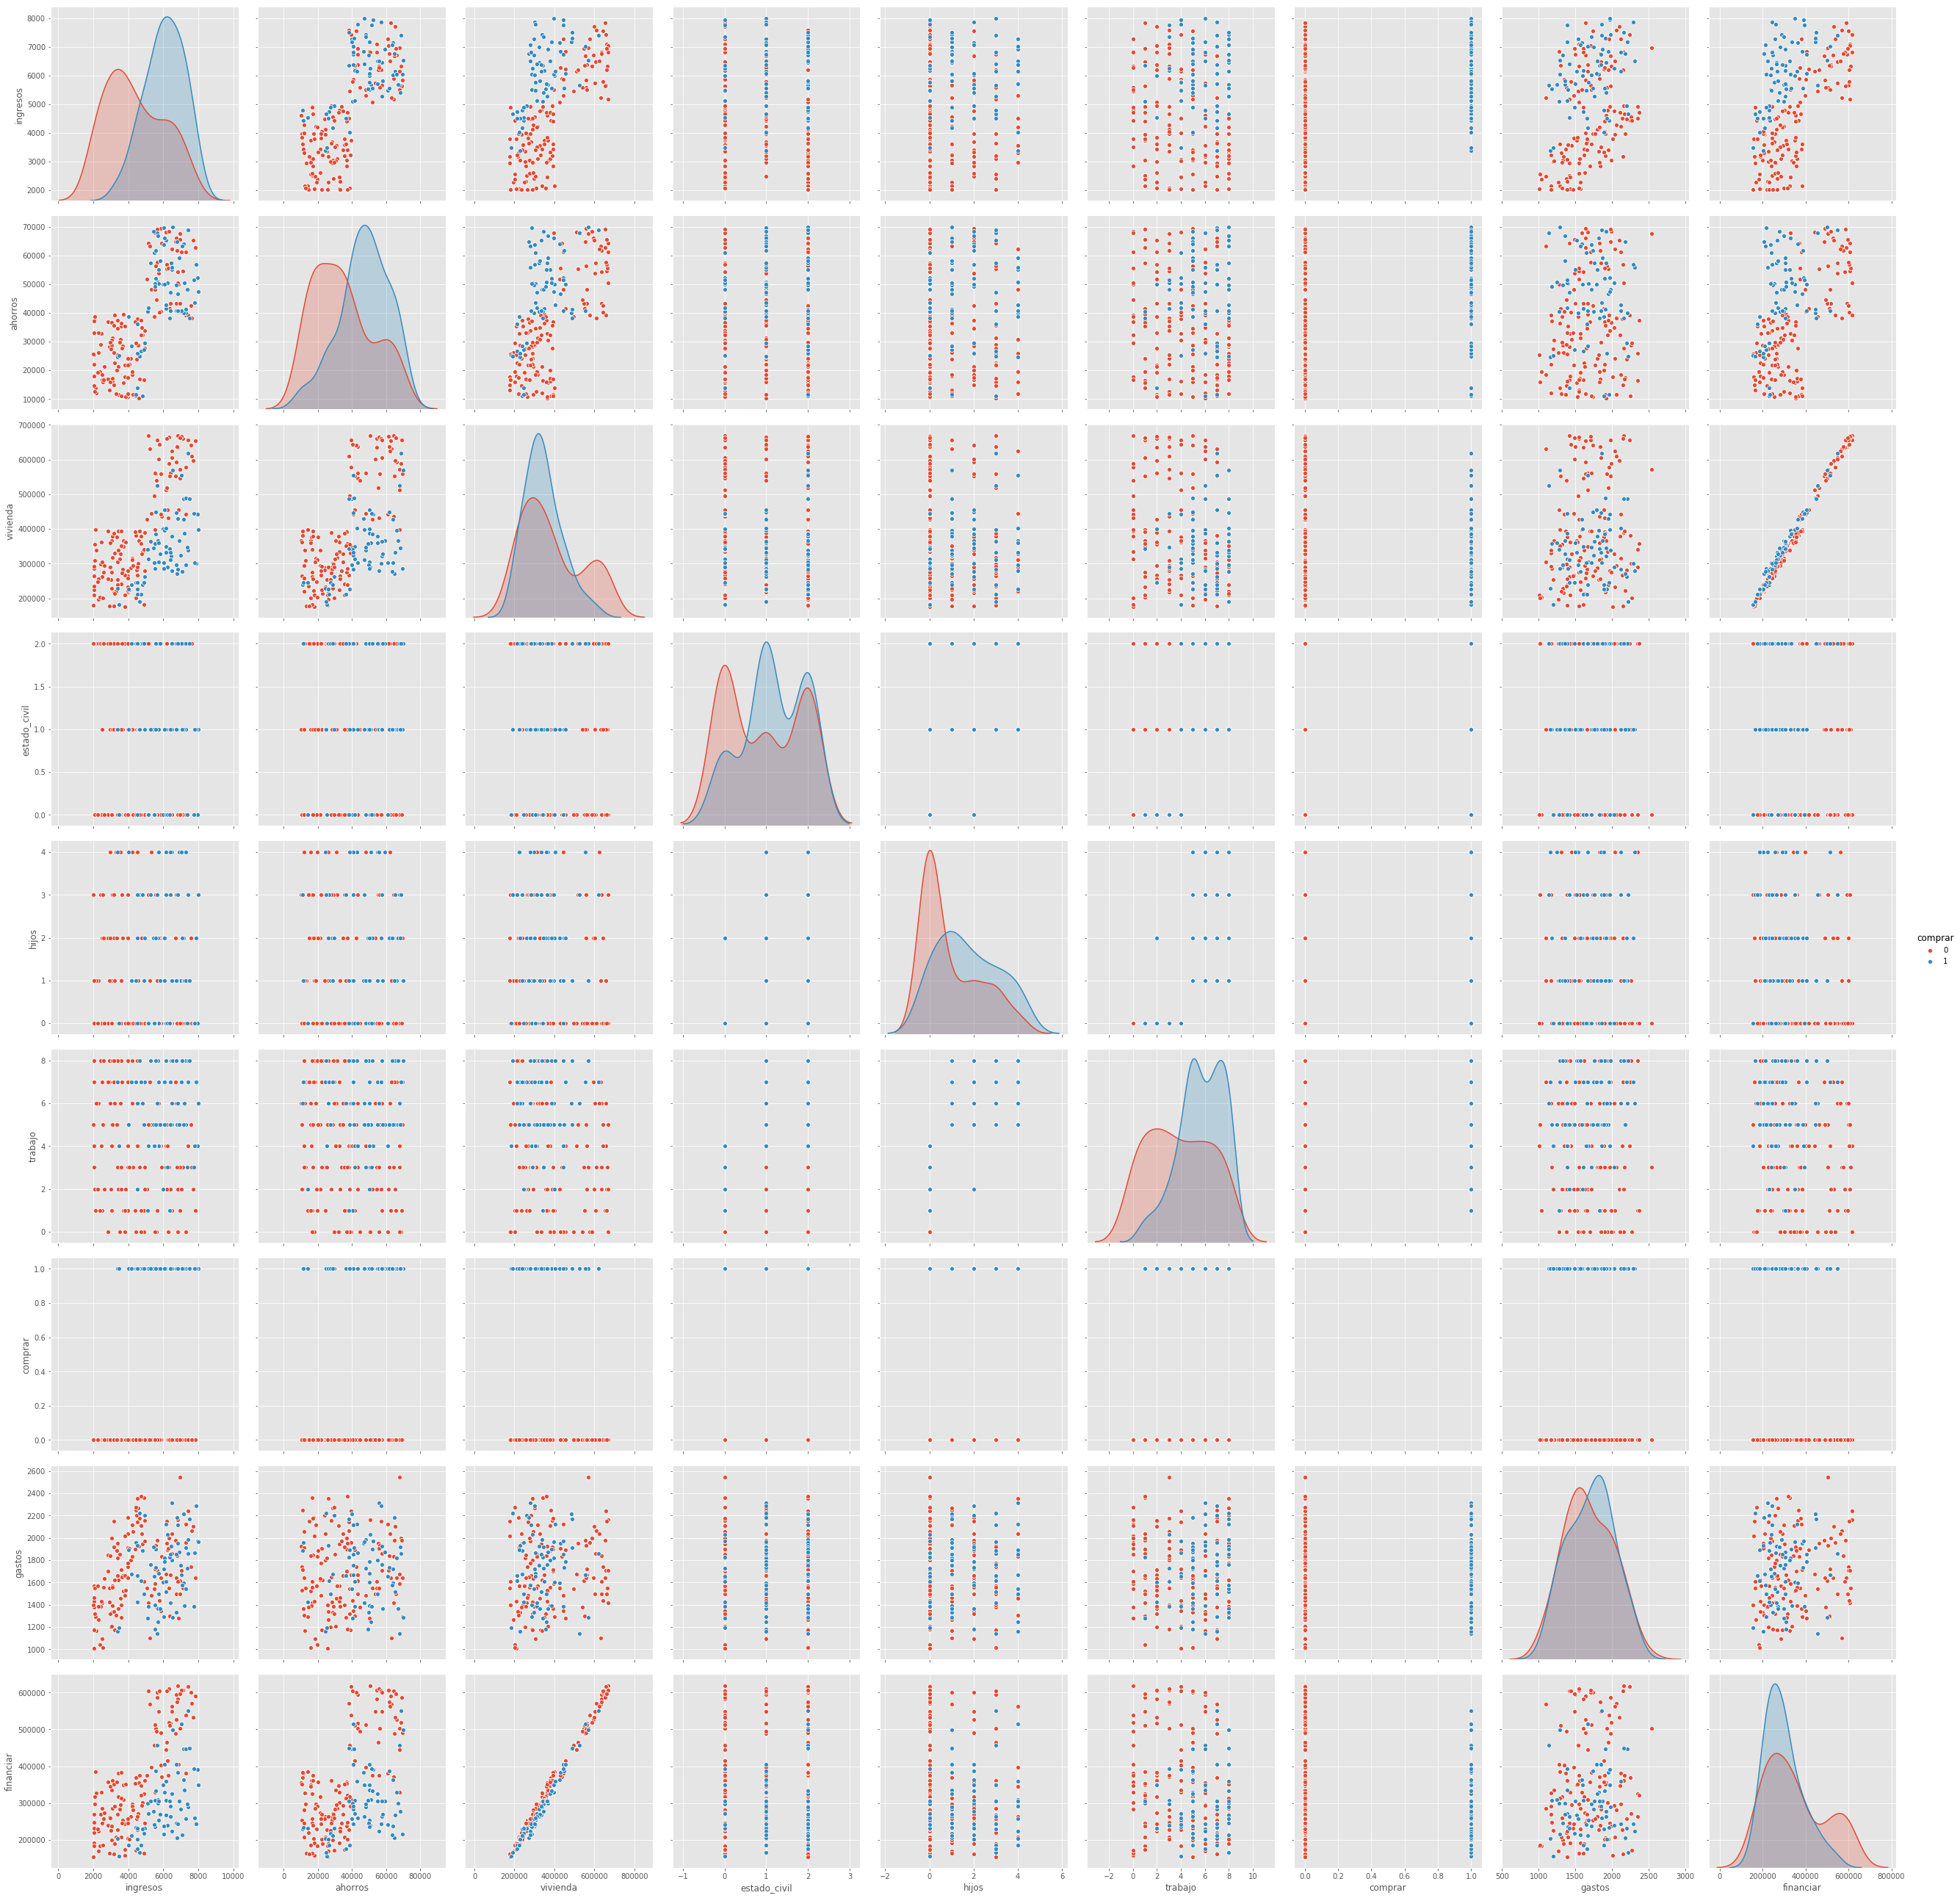

In [18]:
sb.pairplot(df_reduced, hue='comprar',size=4, kind='scatter')

# Creamos el modelo

Dividimos en un set de Entrenamiento y otro de Test con el 20% de las entradas

In [21]:
# Split dataset in training and test datasets
X = df_reduced.drop("comprar", axis = 1).values
y = df_reduced["comprar"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

Entrenamos el modelo

### Caso 1: Iteramos sobre varios valores de profundidad y graficamos la curva da validacion

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,----,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad, random_state=42)
    tree_scores = cross_validate(clf, X_train, y_train, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

In [ ]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

### Caso 2: Probamos el modelo con GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'], 
              'max_depth':[1,2,3,4,5,None],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[2,3,4]}

tree = DecisionTreeClassifier(random_state = 42)
clf = GridSearchCV(tree, parameters, n_jobs = -1, return_train_score = True, cv = 5)
clf.fit(X_train, y_train)

In [ ]:
scores_df = pd.DataFrame(clf.cv_results_)
scores_df.head(10)

In [ ]:
clf.cv_results_['params'][:10]

In [31]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [32]:
y_test_pred = clf.predict(X_test)

In [33]:
accuracy_score(y_test, y_test_pred)

0.8048780487804879

# Resultados

In [34]:
print(confusion_matrix(y_test, y_test_pred))

[[24  0]
 [ 8  9]]


In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        24
           1       1.00      0.53      0.69        17

    accuracy                           0.80        41
   macro avg       0.88      0.76      0.77        41
weighted avg       0.85      0.80      0.79        41



## Nuevas Predicciones

Generamos casos para recomendar si convine Alquilar (0) y Comprar (1):

In [47]:
# Los valores que debemos ingresar son:
#                   ingresos, ahorros, vivienda, estado_civil, hijos, trabajo, gastos, financiar
print(clf.predict([[6250,     55555,   600000,   0,            0,     1,       1856,   548852],
                   [6250,     55555,   750000,   0,            0,     7,       1856,   548852]]))
                  
# Resultado esperado 
## 0-Alquilar, 
## 1-Comprar casa

[0 1]
